<a href="https://colab.research.google.com/github/geworgia/ML_challenge/blob/main/basicImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
IMG_SIZE = (224, 224)

def process_image(img_path):
    img = load_img(img_path, target_size=IMG_SIZE)
    img = img_to_array(img) / 255.0  # Normalization
    return img

In [4]:
img1_path = "/content/img1.jpg"
img2_path = "/content/img2.jpg"

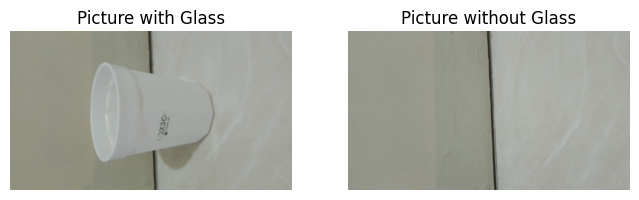

In [5]:
img1 = load_img(img1_path)
img2 = load_img(img2_path)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Picture with Glass")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(img2)
plt.title("Picture without Glass")
plt.axis("off")

plt.show()

preprocessing

In [6]:
X = np.array([process_image(img1_path), process_image(img2_path)])
y = np.array([1, 0])

In [7]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

augmented_images = []
augmented_labels = []

for i in range(len(X)):
    img = X[i].reshape((1, 224, 224, 3))
    it = datagen.flow(img, batch_size=1)

    for _ in range(15):  # Tambah jumlah augmentasi
        aug_img = next(it)[0]
        augmented_images.append(aug_img)
        augmented_labels.append(y[i])

X_aug = np.array(augmented_images)
y_aug = np.array(augmented_labels)

# Gabungkan data asli dan augmentasi
X_total = np.concatenate((X, X_aug), axis=0)
y_total = np.concatenate((y, y_aug), axis=0)

In [8]:
X_train, X_val, y_train, y_val = train_test_split(X_total, y_total, test_size=0.2, random_state=42)

In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      22,151,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,245,825 (84.86 MB)

 Trainable params: 22,245,377 (84.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), batch_size=8)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5817 - loss: 1.7651 - val_accuracy: 0.5714 - val_loss: 0.6973
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9270 - loss: 0.4684 - val_accuracy: 0.5714 - val_loss: 0.6960
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 0.0162 - val_accuracy: 0.5714 - val_loss: 0.7472
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9757 - loss: 0.1889 - val_accuracy: 0.5714 - val_loss: 0.8488
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 1.0000 - loss: 5.3191e-05 - val_accuracy: 0.5714 - val_loss: 0.9996
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.9388 - loss: 0.3806 - val_accuracy: 0.5714 - val_loss: 1.2005
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.9382 - loss: 0.4795 - val_accuracy: 0.5714 - val_loss: 1.3974
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 1.0000 - loss: 3.3286e-07 - val_accuracy: 0.5714 - val_loss: 1.6043
Epoc

In [11]:
y_pred = (model.predict(X_val) > 0.5).astype(int)
print(classification_report(y_val, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         4
           1       0.00      0.00      0.00         3

    accuracy                           0.57         7
   macro avg       0.29      0.50      0.36         7
weighted avg       0.33      0.57      0.42         7



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


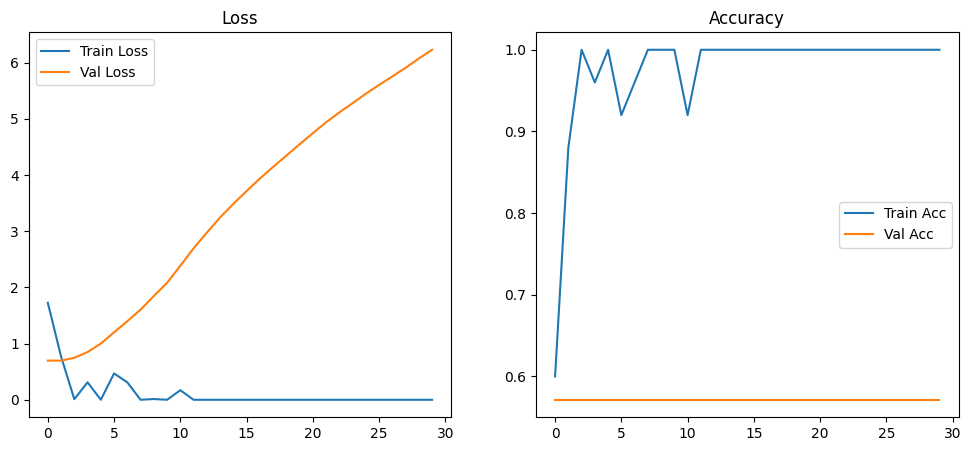

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.show()

one with glass and one without. This may relate to a model or experiment that compares results with and without a particular element (in this case, glass).

The output provided shows the model evaluation metrics, including loss and accuracy during the training and validation process. From the possibly related graphs, it can be seen that the loss and accuracy are measured at intervals of 0 to 30, which may refer to specific epochs or training steps.

In the final evaluation, the model showed an accuracy of 57%, with varying precision and recall for two different classes (class 0 and class 1). For class 0, the model had 57% precision and 100% recall, which resulted in an F1 score of 73%. However, for class 1, the model did not manage to identify correctly, resulting in a precision, recall, and F1 score of 0%.

Overall, the model had limited performance, with moderate accuracy and an inability to correctly classify class 1. This suggests that the model may require further customization or additional data to improve its performance, especially in identifying class 1.